<a href="https://colab.research.google.com/github/lapshinaaa/homework_DeepLearning/blob/main/Lapshina_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/2024/homeworks/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 1: Генеративные сети</center></h2>

# Введение

Не все же нам MNIST генерировать. Давайте посмотрим, как генеративные модели могут использоваться не только для развлечения. Поехали!

Немного вступления и мотивации, для чего мы хотим обучать модель.

## MAGIC – Major Atmospheric Gamma Imaging Cherenkov Telescope

MAGIC (Major Atmospheric Gamma Imaging Cherenkov) - это система, состоящая из двух черенковских телескопов диаметром 17 м. Они предназначены для наблюдения гамма-лучей от галактических и внегалактических источников в диапазоне очень высоких энергий (от 30 ГэВ до 100 ТэВ).

MAGIC позволил открыть и исследовать новые классы источников гамма-излучения, таких как, например, пульсары и гамма-всплески (GRB).

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/2024/homeworks/hw1/img/magic1.jpg?raw=1" width="1000"></center>

Источник: https://magic.mpp.mpg.de/

Youtube video: https://youtu.be/mjcDSR2vSU8

#### Ок, давайте зафиксируем. Какой-то крутой телескоп позволяет открыть новые виды излучения. Идем дальше.

## Частицы из космоса

Космические частицы, $\gamma$-кванты (фотоны) и адроны (протоны), взаимодействуют с атмосферой и порождают ливни вторичных частиц. Двигаясь с околосветовой скоростью, эти частицы излучают Черенковское излучение. Телескопы фотографируют это излучение.
#### По фотографиям можно определить тип частицы из космоса: фотон или протон. Знакомая формулировка задачи, не правда ли?

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/2024/homeworks/hw1/img/shower.jpg?raw=1" width="500"></center>

## Фотографии

Задача атмосферного черенковского телескопа - получить изображение ливня путем измерения черенковского света от частиц ливня. Это изображение представляет собой геометрическую проекцию ливня на детектор. Для анализа этих изображений были введены параметры изображения или так называемые параметры Хилласа. Ниже пример такой фотографии.

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/2024/homeworks/hw1/img/geo.jpg?raw=1" width="400"></center>

#### Итак, каждая фотография описывается набором параметров, которые за нас считает телесоп. А что там с двумя видами частиц?

## Фотоны vs адронов

Изображения для $\gamma$-квантов (фотонов) и адронов (протонов) отличаются по форме кластеров. Астрономы используют модели машинного обучения для классификации этих изображений. Получение каждого такого изображения - дорогое удовольствие!


<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/2024/homeworks/hw1/img/gamma_p.png?raw=1" width="600"></center>

Для обучения моделей ученые искусственно генерируют такие изображения для каждого типа частиц с помощью сложных физических симуляторов.

#### Итак, давайте сэкономим денег для ученых и сгенерируем хороших фотографий разных частиц. Используем для этого GAN и диффузионные модели!

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Данные

Будем использовать данные телескопа MAGIC из UCI репозитория https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. Каждый объект в данных - параметры одного изображения кластера и метка этого кластера (фотон или адрон):


0. Length: major axis of ellipse [mm]
1. Width: minor axis of ellipse [mm]
2. Size: 10-log of sum of content of all pixels [in #phot]
3. Conc: ratio of sum of two highest pixels over fSize [ratio]
4. Conc1: ratio of highest pixel over fSize [ratio]
5. Asym: distance from highest pixel to center, projected onto major axis [mm]
6. M3Long: 3rd root of third moment along major axis [mm]
7. M3Trans: 3rd root of third moment along minor axis [mm]
8. Alpha: angle of major axis with vector to origin [deg]
9. Dist: distance from origin to center of ellipse [mm]
10. class: g,h # gamma (signal), hadron (background)

In [64]:
# read data
names = np.array(
    [
        "Length",
        "Width",
        "Size",
        "Conc",
        "Conc1",
        "Asym",
        "M3Long",
        "M3Trans",
        "Alpha",
        "Dist",
        "class",
    ]
)
data = pd.read_csv("magic04.data", header=None)
data.columns = names
print(data.shape)
data.head()

(19020, 11)


,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# Постановка задачи

Ваша задача заключается в том, чтобы с помощью генеративно-состязательных сетей научиться генерировать параметры кластеров на изображениях телескопа для каждого типа частиц (фотона или адрона):

- $X$ - матрица реальных объектов, которые нужно начиться генерировать;
- $y$ - метки классов, которые будем использовать как условие при генерации.

In [65]:
# параметры кластеров на изображениях
X = data[names[:-1]].values
X = np.abs(X)

# метки классов
labels = data[names[-1]].values
y = np.ones((len(labels), 1))
y[labels == "h"] = 0

In [66]:
# примеры
X[:2]

array([[2.87967e+01, 1.60021e+01, 2.64490e+00, 3.91800e-01, 1.98200e-01,
        2.77004e+01, 2.20110e+01, 8.20270e+00, 4.00920e+01, 8.18828e+01],
       [3.16036e+01, 1.17235e+01, 2.51850e+00, 5.30300e-01, 3.77300e-01,
        2.62722e+01, 2.38238e+01, 9.95740e+00, 6.36090e+00, 2.05261e+02]])

In [67]:
# примеры
y[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [68]:
# все возможные значения
np.unique(y)

array([0., 1.])

# Визуализация данных

Каждое изображение описывается 10 параметрами. Давайте построим распределения значений каждого параметра для каждого типа частиц.

In [69]:
def plot_hists(X1, X2, names, label1, label2, bins=np.linspace(-3, 3, 61)):
    plt.figure(figsize=(5 * 4, 5 * 2))
    for i in range(X1.shape[1]):
        plt.subplot(3, 4, i + 1)
        plt.grid()
        plt.hist(X1[:, i], bins=bins, alpha=0.3, label=label1, color="C4")
        plt.hist(X2[:, i], bins=bins, alpha=0.3, label=label2, color="C0")
        plt.xlabel(names[i], size=14)
        plt.legend(loc="best")
    plt.tight_layout()

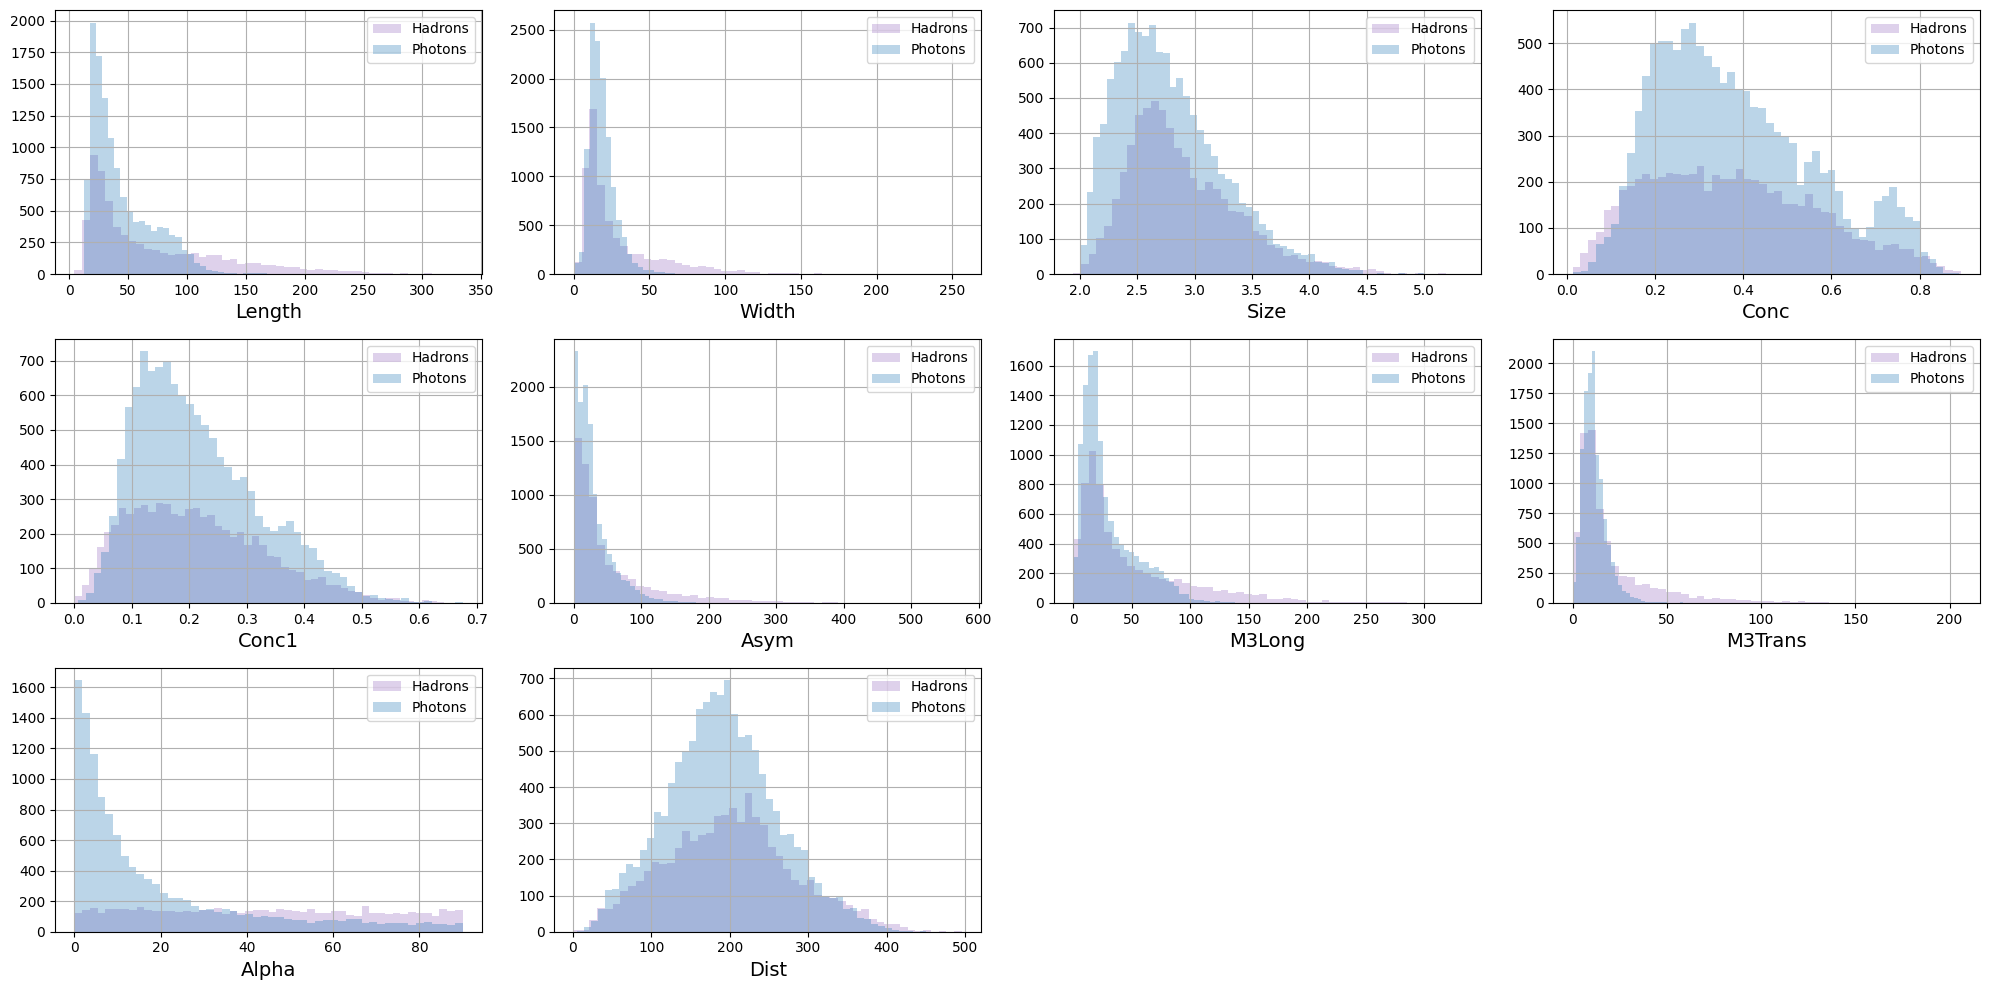

In [70]:
plot_hists(
    X[y[:, 0] == 0], X[y[:, 0] == 1], names, label1="Hadrons", label2="Photons", bins=50
)

# Предобработка данных

Из графика видим, что распределения для многих признаков имеют тяжелые хвосты. Это делает обучение генеративных моделей тяжелее. Поэтому нужно как-то преобразовать данные, чтобы убрать эти тяжелые хвосты.

# Обучающая и тестовая выборки

In [71]:
from sklearn.model_selection import train_test_split

# train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.5, shuffle=True, random_state=11
)

In [72]:
#X_train[0].shape

## Задание 1 (0.2 балла)

Проиллюстрируйте распределение y внутри train и test выборки.

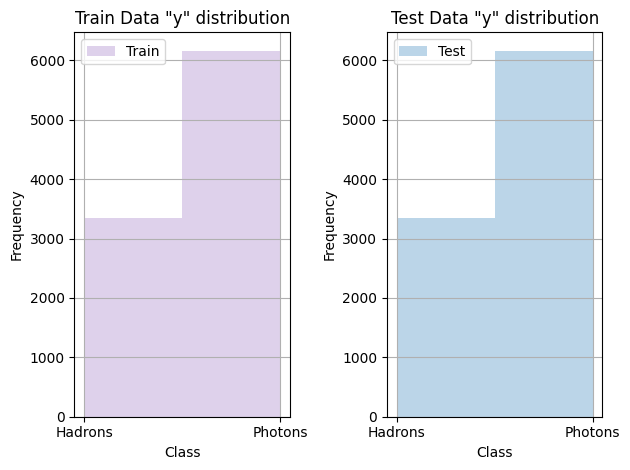

In [73]:
# plotting distribution of y_train and y_test

# train data
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=2, alpha=0.3, color='C4', label='Train')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Train Data "y" distribution')
plt.xticks([0, 1], ['Hadrons', 'Photons'])
plt.grid()
plt.legend()

# test data
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=2, alpha=0.3, color='C0', label='Test')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Test Data "y" distribution')
plt.xticks([0, 1], ['Hadrons', 'Photons'])
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## Задание 2 (0.8 балл)

Используя функцию `sklearn.preprocessing.QuantileTransformer` трансформируйте входные данные `X_train` и `X_test`. Это преобразование делает так, чтобы распределение каждого параметра было нормальным. Описание функции доступно по [ссылке](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html). Используйте значение параметра `output_distribution='normal'`.

In [74]:
from sklearn.preprocessing import QuantileTransformer

# initializing a quantile transformer and applying to our data
qt = QuantileTransformer(n_quantiles=1000, random_state=15, output_distribution='normal')

X_train = qt.fit_transform(X_train)
X_test = qt.transform(X_test)

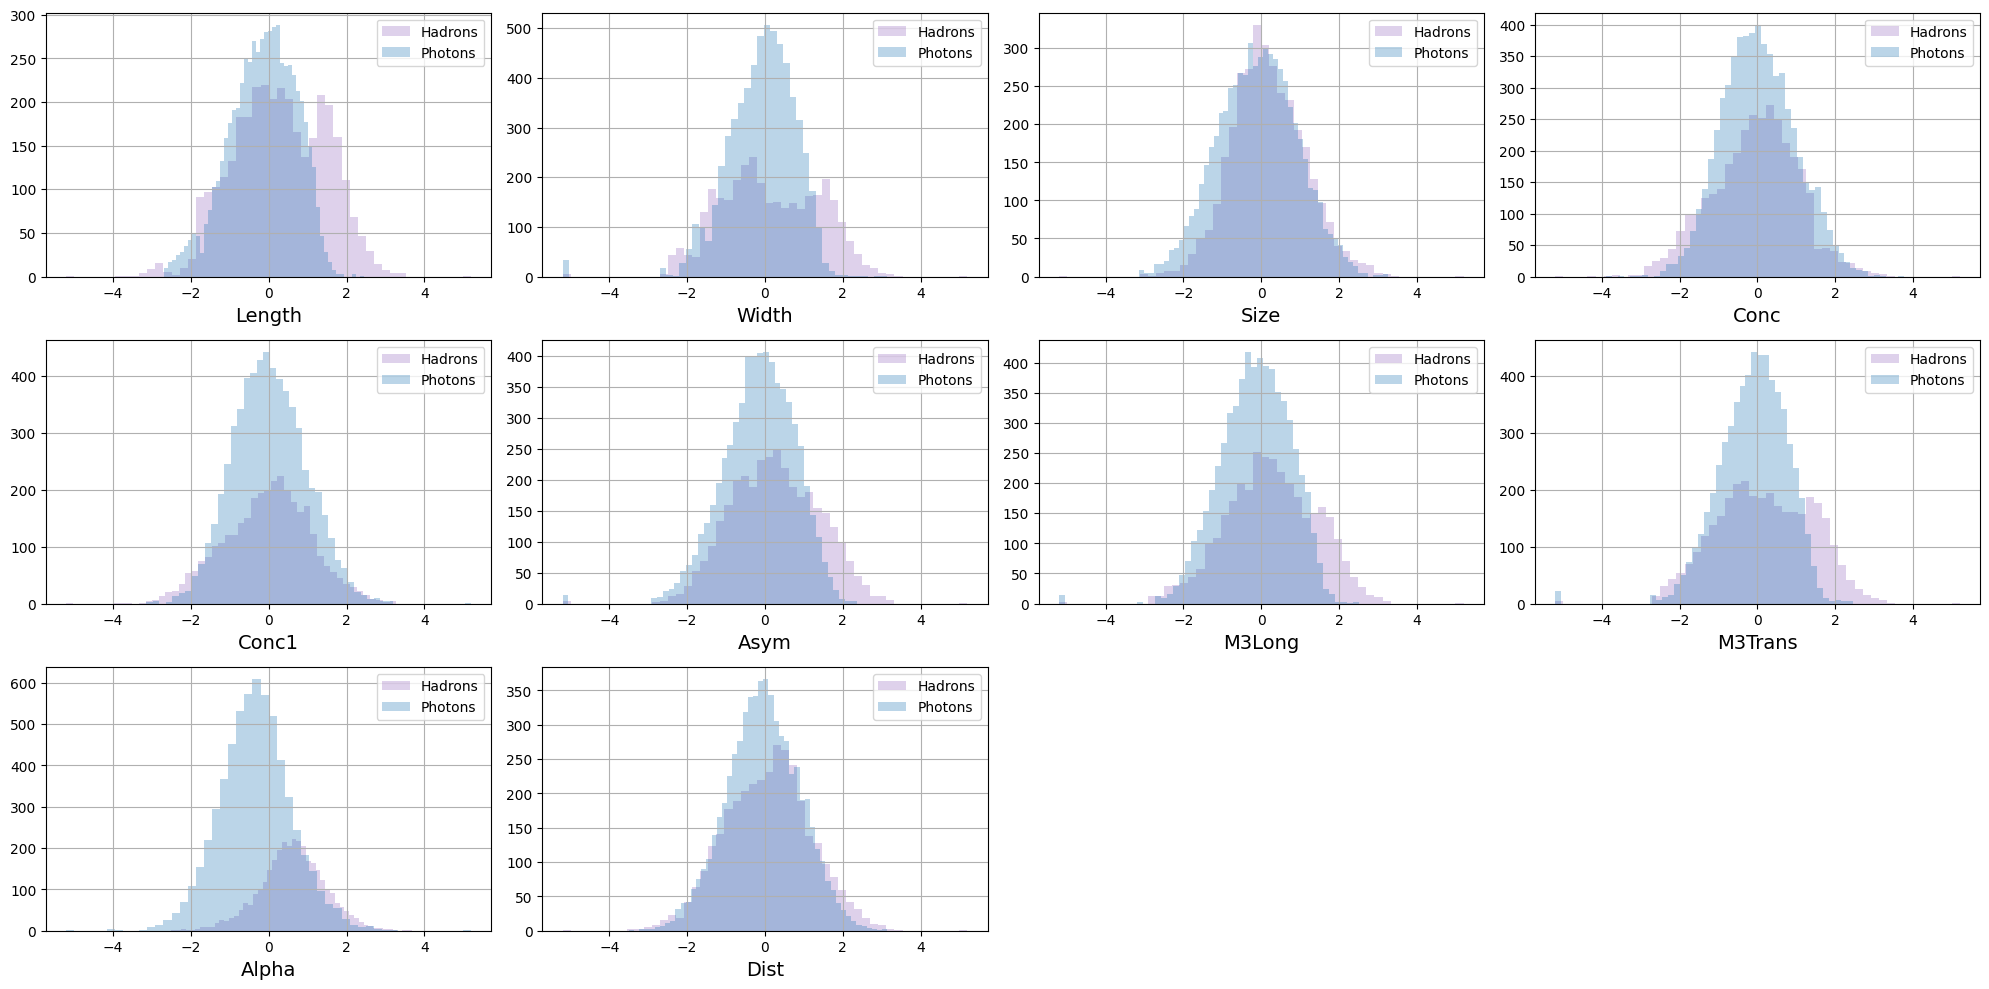

In [75]:
plot_hists(
    X_train[y_train[:, 0] == 0],
    X_train[y_train[:, 0] == 1],
    names,
    label1="Hadrons",
    label2="Photons",
    bins=50,
)

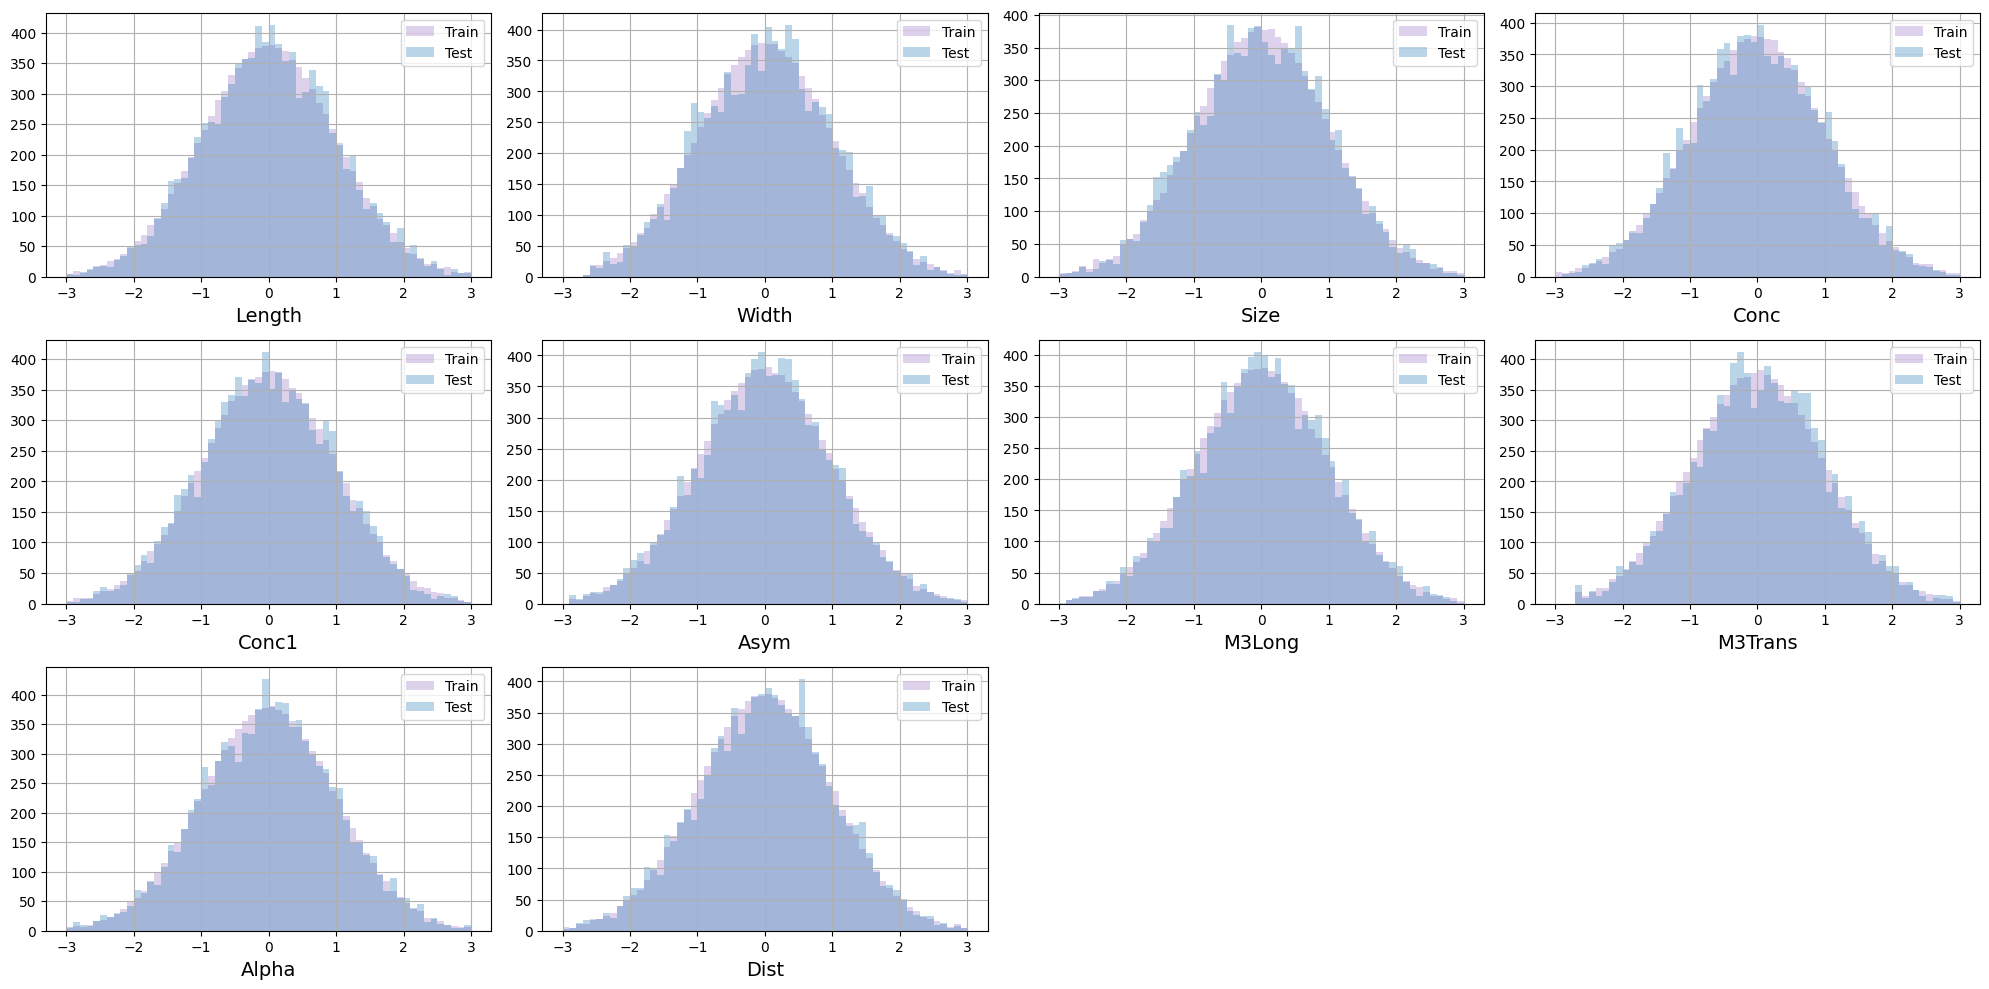

In [76]:
plot_hists(X_train, X_test, names, label1="Train", label2="Test")

Now we've successfully achieved normal distribution.

# Conditional WGAN

Мы будем использовать `Conditional WGAN`, который изображен на рисунке. В качестве условия `y` мы будем использовать метку класса: **0** - адрон, **1** - фотон. Таким образом, мы будем сообщать генератору для какой частицы нужно генерировать параметры изображения.

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/2024/homeworks/hw1/img/cgan.png?raw=1" width="800"></center>

Генератор $\hat{x} = G(z, y)$ будет принимать на вход шумовой вектор $z$ и вектор условий $y$, а выдавать будет сгенерированный (фейковый) вектор параметров $\hat{x}$.

Дискриминатор $D(x, y)$ будет принимать на вход вектор параметров $x$ и вектор условий $y$, а возвращать будет рациональное число.

Обучать `Conditional WGAN` будем с такой функцией потерь:

$$L(G, D) = -\frac{1}{n} \sum_{x_i \in X, y_i \in y} D(x_i, y_i) + -\frac{1}{n} \sum_{z_i \in Z, y_i \in y} D(G(z_i, y_i), y_i) \to \max_G \min_D$$

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [78]:
device

device(type='cuda')

## Задание 3 (0.75 балла)

Реализуйте нейронную сеть для генератора со следующими слоями:
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Выходной слой.

In [ ]:
class Generator(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(Generator, self).__init__()

        self.fc1 = nn.Linear(n_inputs, 100)
        self.bn1 = nn.BatchNorm1d(100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 100)
        self.bn2 = nn.BatchNorm1d(100)
        self.output_layer = nn.Linear(100, n_outputs)

    def forward(self, z, y):
        y = torch.tensor(y, dtype=torch.float, device=device) # convert to tensor
        zy = torch.cat((z, y), dim=1) # here we concatinate noise vector z with the given condition y

        # doing a forward pass
        x = self.fc1(zy)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        output = self.output_layer(x)
   #     print('generator', output)
        return output

## Задание 4 (0.5 балл)

Реализуйте функцию для генерации новый объектов $X$ по вектору условий $y$.

In [ ]:
def generate(generator, y, latent_dim):
    # generating noise first
  #  y = torch.tensor(y, dtype=torch.float32)
    batch_size = y.shape[0]
   # print(batch_size)
    Z_noise = torch.randn(batch_size, latent_dim).to(device)
    #Z_noise = torch.normal(0, 1, (batch_size,latent_dim)).to(device)

    with torch.no_grad():
        X_fake = generator.forward(Z_noise, y) # forward pass: object generation

    X_fake = X_fake.cpu().numpy()
 #   print(X_fake)

    return X_fake  # numpy

## Задание 5 (0.75 балла)

Реализуйте нейронную сеть для дискриминатора со следующими слоями:
- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Выходной слой.

Какая функция активации должна быть в конце работы модели и почему? А она вообще тут должна быть? Обоснуйте свой выбор.

**There's no activation function** after the last fully connected layer. Here's a very nice explanation found on https://www.programmersought.com/article/1883748139/   :
The discriminator's loss function approximates the Wasserstein distance between the real distribution and the generated distribution during training. The original GAN ​​discriminator does the true and false two-class task, so the last layer is sigmoid, but now the discriminator in WGAN is doing the approximate fitting Wasserstein distance, which belongs to the regression task. The output is now a score, therefore, we do not need any activation function.

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, n_inputs):
        super(Discriminator, self).__init__()

        self.fc1 = nn.Linear(n_inputs, 100)
        self.ReLU = nn.ReLU()
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)

    def forward(self, x, y):
        xy = torch.cat((x, y), dim=1) # concatenating input with condition

        # doing the forward pass
        x = self.fc1(xy)
        x = self.ReLU(x)
        x = self.fc2(x)
        x = self.ReLU(x)
        output = self.fc3(x)
     #   print(output)

        return output

## Задание 6 (0.5 балла)

Реализуйте функцию, которая принимала бы на вход набор сгенерированных и настоящих объектов, разбивала на train и test с учетом баланса классов (real и fake объектов), с соотношением 3 к 1, обучала модель логистической регрессии и градиентного бустинга, которые учились бы отличать настоящие объекты от фальшивых, после чего выводила бы accuracy score на отложенной выборке у обоих моделей.

Ответьте на вопрос: какое значение accuracy score нас бы удовлетворило больше всего? Почему?

In [79]:
# necessary imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

In [80]:
def other_agent_score(X_real, y_real, X_fake, y_fake):
    # concatenating real and fake data
    X = np.concatenate((X_real, X_fake), axis=0)
    y = np.concatenate((y_real, y_fake), axis=0)
    #print(X)

    # splitting the data into train and test (using 'stratify' for keeping balance)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=18)

    # initializing and training models
    # logistic regressor
    lin_regressor = LogisticRegression()
    lin_regressor.fit(X_train, y_train)
    lin_reg_pred = lin_regressor.predict(X_test)

    # gradient boosting classifier
    boost_class = GradientBoostingClassifier()
    boost_class.fit(X_train, y_train)
    boost_pred = boost_class.predict(X_test)
  #  print(boost_pred)
    #print(X_test)

    lin_reg_score = accuracy_score(lin_reg_pred, y_test)
    boosting_score = accuracy_score(boost_pred, y_test)

    print("Linear regression score: " + str(lin_reg_score))
    print("Boosting score: " + str(boosting_score))

Speaking of the accuracy score, the higher the better. But it's important to keep in mind the trade-off in False Positives and False Negatives ratio. Yet, accuracy alone may not fully capture the quality of the generated samples of the trained conditional WGAN. It's essential to complement accuracy with other metrics, such as AUC-ROC.
* Important note: for the Discriminator, the best accuracy would be 0.5. It is because as the generator improves with training, the discriminator performance gets worse because the discriminator can’t easily tell the difference between real and fake. If the generator succeeds perfectly, then the discriminator has a 50% accuracy. In effect, the discriminator flips a coin to make its prediction. (source: https://mull-overthing.com/what-is-accuracy-in-gan/#Why_does_the_accuracy_of_the_discriminator_remain_around_50)

## Задание 7 (1.5 балла)

Реализуйте класс для обучения генеративной модели.

- Уточнение 1: Нужно ограничивать веса дискриминатора. Для этого используйте `p.data.clamp_(-0.01, 0.01)`, где `p` веса дискриминатора. Зачем это делать можно посмотреть в оригинальной статье <https://arxiv.org/pdf/1701.07875.pdf>.
- Подсказка 1: `n_critic` - число итераций обучения дискриминатора на одну итерацию обучения генератора.
- Подсказка 2: Используйте `X_tensor = torch.tensor(X_numpy, dtype=torch.float, device=DEVICE)` для перевода numpy в тензор.

In [ ]:
class Fitter(object):
    def __init__(
        self,
        generator,
        discriminator,
        batch_size=32,
        n_epochs=10,
        latent_dim=1,
        lr=0.0001,
        n_critic=5,
    ):

        self.generator = generator
        self.discriminator = discriminator
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr
        self.n_critic = n_critic

        self.opt_gen = torch.optim.RMSprop(self.generator.parameters(), lr=self.lr)
        self.opt_disc = torch.optim.RMSprop(self.discriminator.parameters(), lr=self.lr)

        self.generator.to(device)
        self.discriminator.to(device)

    def fit(self, X, y):

        # numpy to tensor
        X_real = torch.tensor(X, dtype=torch.float, device=device)
        y_cond = torch.tensor(y, dtype=torch.float, device=device)

        # tensor to dataset
        dataset_real = TensorDataset(X_real, y_cond)

        # Turn on training
        self.generator.train(True)
        self.discriminator.train(True)

        self.loss_history = []

        # Fit GAN
        for epoch in range(self.n_epochs):
            for i, (real_batch, cond_batch) in enumerate(
                DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True)
            ):

                # training Discriminator
                for _ in range(self.n_critic):
                  self.opt_disc.zero_grad()

                  # generate fake data
                 # Z_noise = torch.normal(0, 1, (len(real_batch), self.latent_dim)).to(device)
                  Z_noise = torch.randn((len(real_batch), self.latent_dim)).to(device)
                  X_fake = self.generator(Z_noise, cond_batch)
               #   print(X_fake.dtype)  -> it's already a tensor

                  # forward pass: calculate loss function
                  loss_discriminator = -torch.mean(self.discriminator(real_batch, cond_batch)) + torch.mean(self.discriminator(X_fake, cond_batch))

                  # backpropagation and weight update
                  loss_discriminator.backward()
                  self.opt_disc.step()

                  # clamp the weights according to the requirement in the task
                  for p in self.discriminator.parameters():
                    p.data.clamp_(-0.01, 0.01)

                # training Generator
                self.opt_gen.zero_grad()

                # generate fake data
               # Z_noise = torch.normal(0, 1, (len(real_batch), self.latent_dim)).to(device)
                Z_noise = torch.randn((len(real_batch), self.latent_dim)).to(device)
                X_fake = self.generator(Z_noise, cond_batch)

                # forward pass: calculate generator loss
                gen_loss = -torch.mean(self.discriminator(X_fake, cond_batch))

                # backpropagation and weight update
                gen_loss.backward()
                self.opt_gen.step()

            # calculate and store loss after an epoch
            Z_noise = torch.normal(0, 1, (len(X_real), self.latent_dim)).to(device)
            X_fake = self.generator(Z_noise, y_cond)
            loss_epoch = -torch.mean(self.discriminator(X_real, y_cond)) + torch.mean(
                self.discriminator(X_fake, y_cond)
            )
            self.loss_history.append(loss_epoch.detach().cpu())

            # Создайте выборку из 1000 объектов из X_train и 1000 сгенерированных объектов
            # И запустите работу фукнции other_agent_score

            X_fake_samples = generate(self.generator, y_cond[:1000], self.latent_dim)
            X_real_samples = X_real[:1000].cpu().numpy()

            # launching other_agent_score function
            other_agent_score(X_real_samples, np.ones(len(X_real_samples)), X_fake_samples, np.zeros(len(X_fake_samples)))
            print(f"Loss after {epoch+1} epoch is: {loss_epoch}")

        # Turn off training
        self.generator.train(False)
        self.discriminator.train(False)

## Обучение
Обучим модель на данных.

In [ ]:
%%time
latent_dim = 10
generator = Generator(n_inputs=latent_dim + y.shape[1], n_outputs=X_train.shape[1])
discriminator = Discriminator(n_inputs=X_train.shape[1] + y.shape[1])

fitter = Fitter(
    generator,
    discriminator,
    batch_size=50,
    n_epochs=100,
    latent_dim=latent_dim,
    lr=0.0001,
    n_critic=5,
)
fitter.fit(X_train, y_train)

Linear regression score: 0.5416666666666666
Boosting score: 0.7033333333333334
Loss after 1 epoch is: -0.0004588598385453224
Linear regression score: 0.5366666666666666
Boosting score: 0.6633333333333333
Loss after 2 epoch is: -7.626786828041077e-05
Linear regression score: 0.5366666666666666
Boosting score: 0.635
Loss after 3 epoch is: -0.00014274660497903824
Linear regression score: 0.5366666666666666
Boosting score: 0.6616666666666666
Loss after 4 epoch is: -2.5630928575992584e-05
Linear regression score: 0.5566666666666666
Boosting score: 0.6116666666666667
Loss after 5 epoch is: -3.9099715650081635e-05
Linear regression score: 0.5633333333333334
Boosting score: 0.62
Loss after 6 epoch is: -1.2802891433238983e-05
Linear regression score: 0.545
Boosting score: 0.6133333333333333
Loss after 7 epoch is: 2.1433457732200623e-05
Linear regression score: 0.565
Boosting score: 0.615
Loss after 8 epoch is: -0.00010012928396463394
Linear regression score: 0.475
Boosting score: 0.613333333333

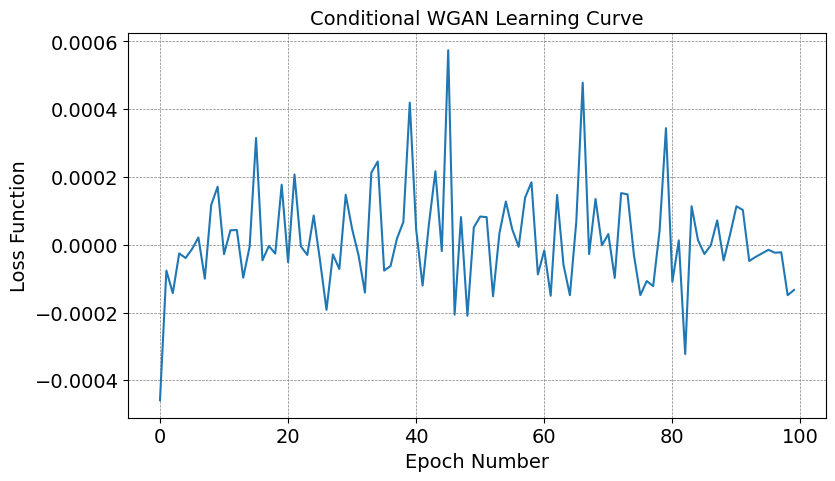

In [ ]:
# WGAN learning curve
plt.figure(figsize=(9, 5))
plt.plot(fitter.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional WGAN Learning Curve", size=14)
plt.grid(linestyle="--", linewidth=0.5, color="0.5")
plt.show()

* Important note: it is, of course, normal that the value of loss function is negative in cerain epochs. Here's a good explanation from the group chat. I quote: В случае WGAN'а в качестве лосса выступает выход критика (дискриминатора) на тех или иных данных. Данный выход непрерывный, ничем не ограничен, хотя и мы ожидаем, что он будет являться оценкой расстояния Вассерштейна. Поэтому данная чиселка может быть отрицательной.

## Задание 8 (0.5 балла)

Теперь сгенерируем фейковые матрицы `X_fake_train` и `X_fake_test`. Сравним их с матрицами реальных объектов `X_train` и `X_test`. Перед сравнением результатов сделайте обратное квантильное преобразование с помощью трансформера, который вы обучили в задании 2.

**The plots below were drawn before applying inverse quantile transfomartion:**

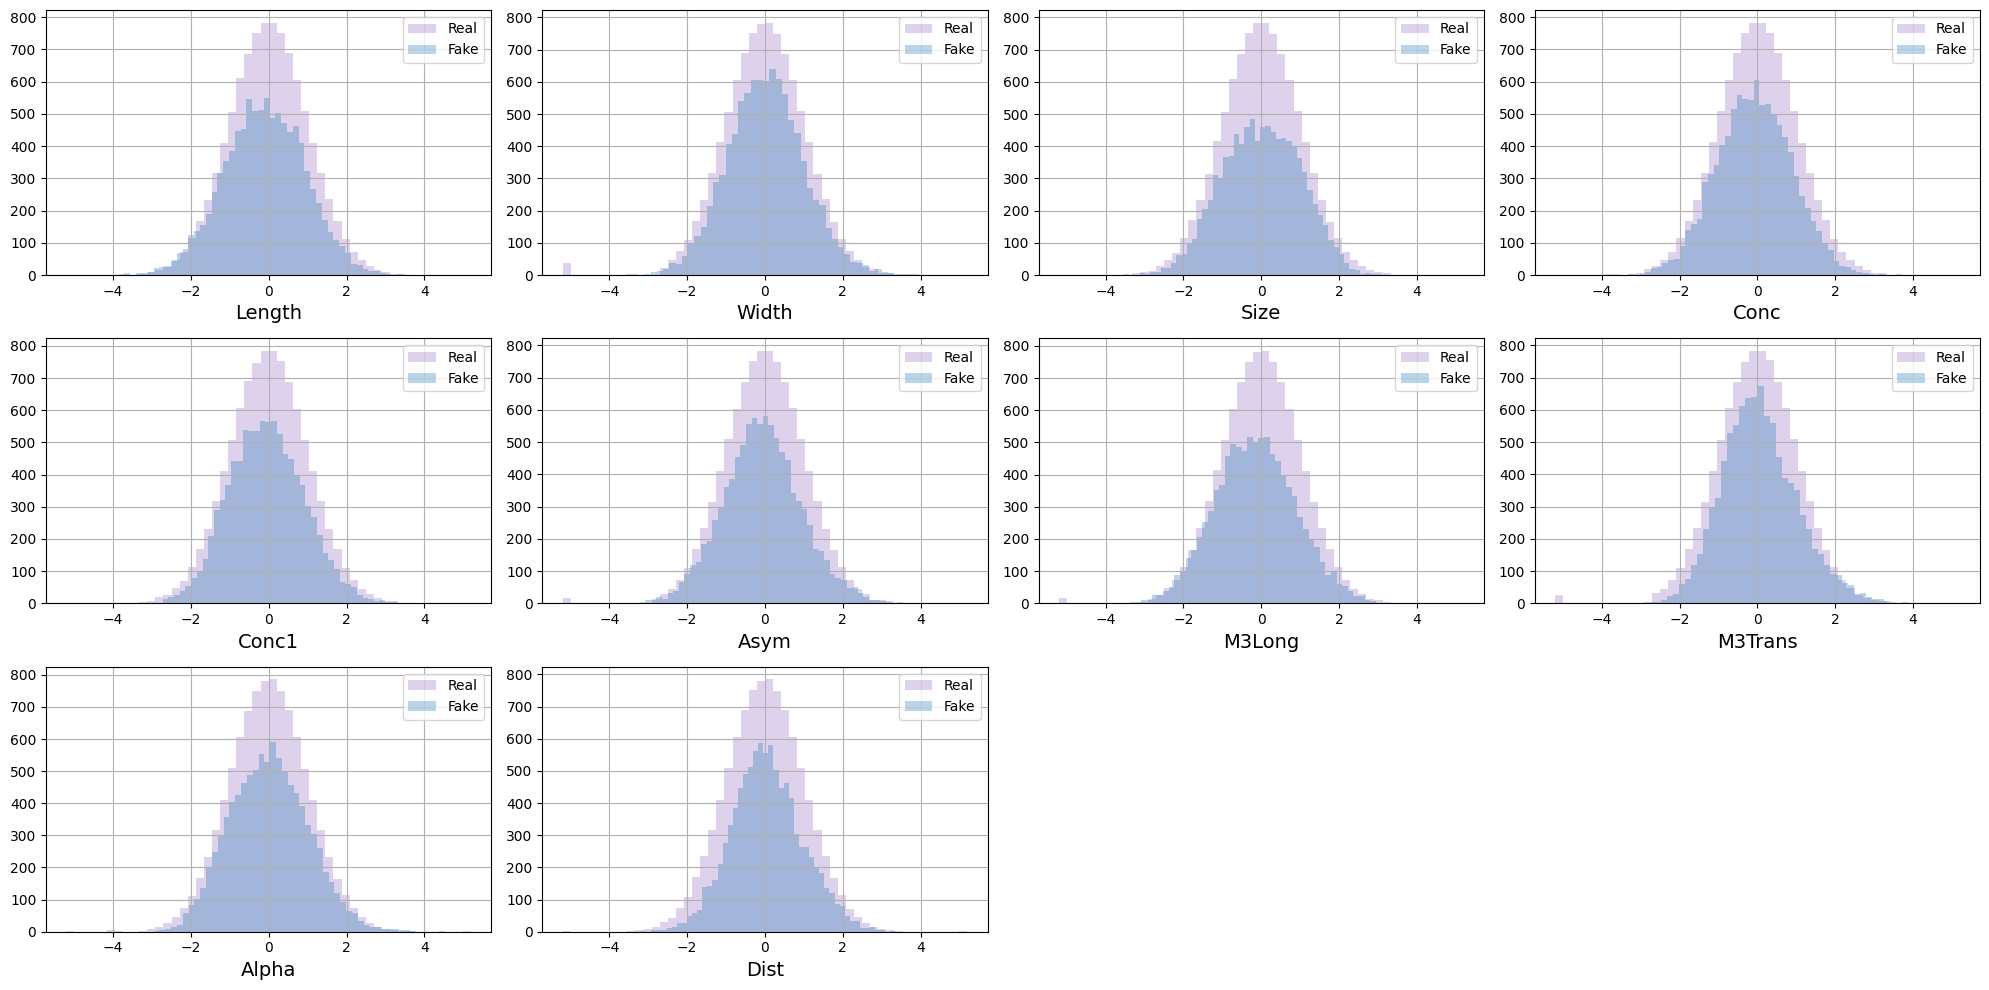

In [ ]:
# before reverse quantiling to illustrate the similarity
plot_hists(X_train, X_fake_train, names, label1="Real", label2="Fake", bins=50)

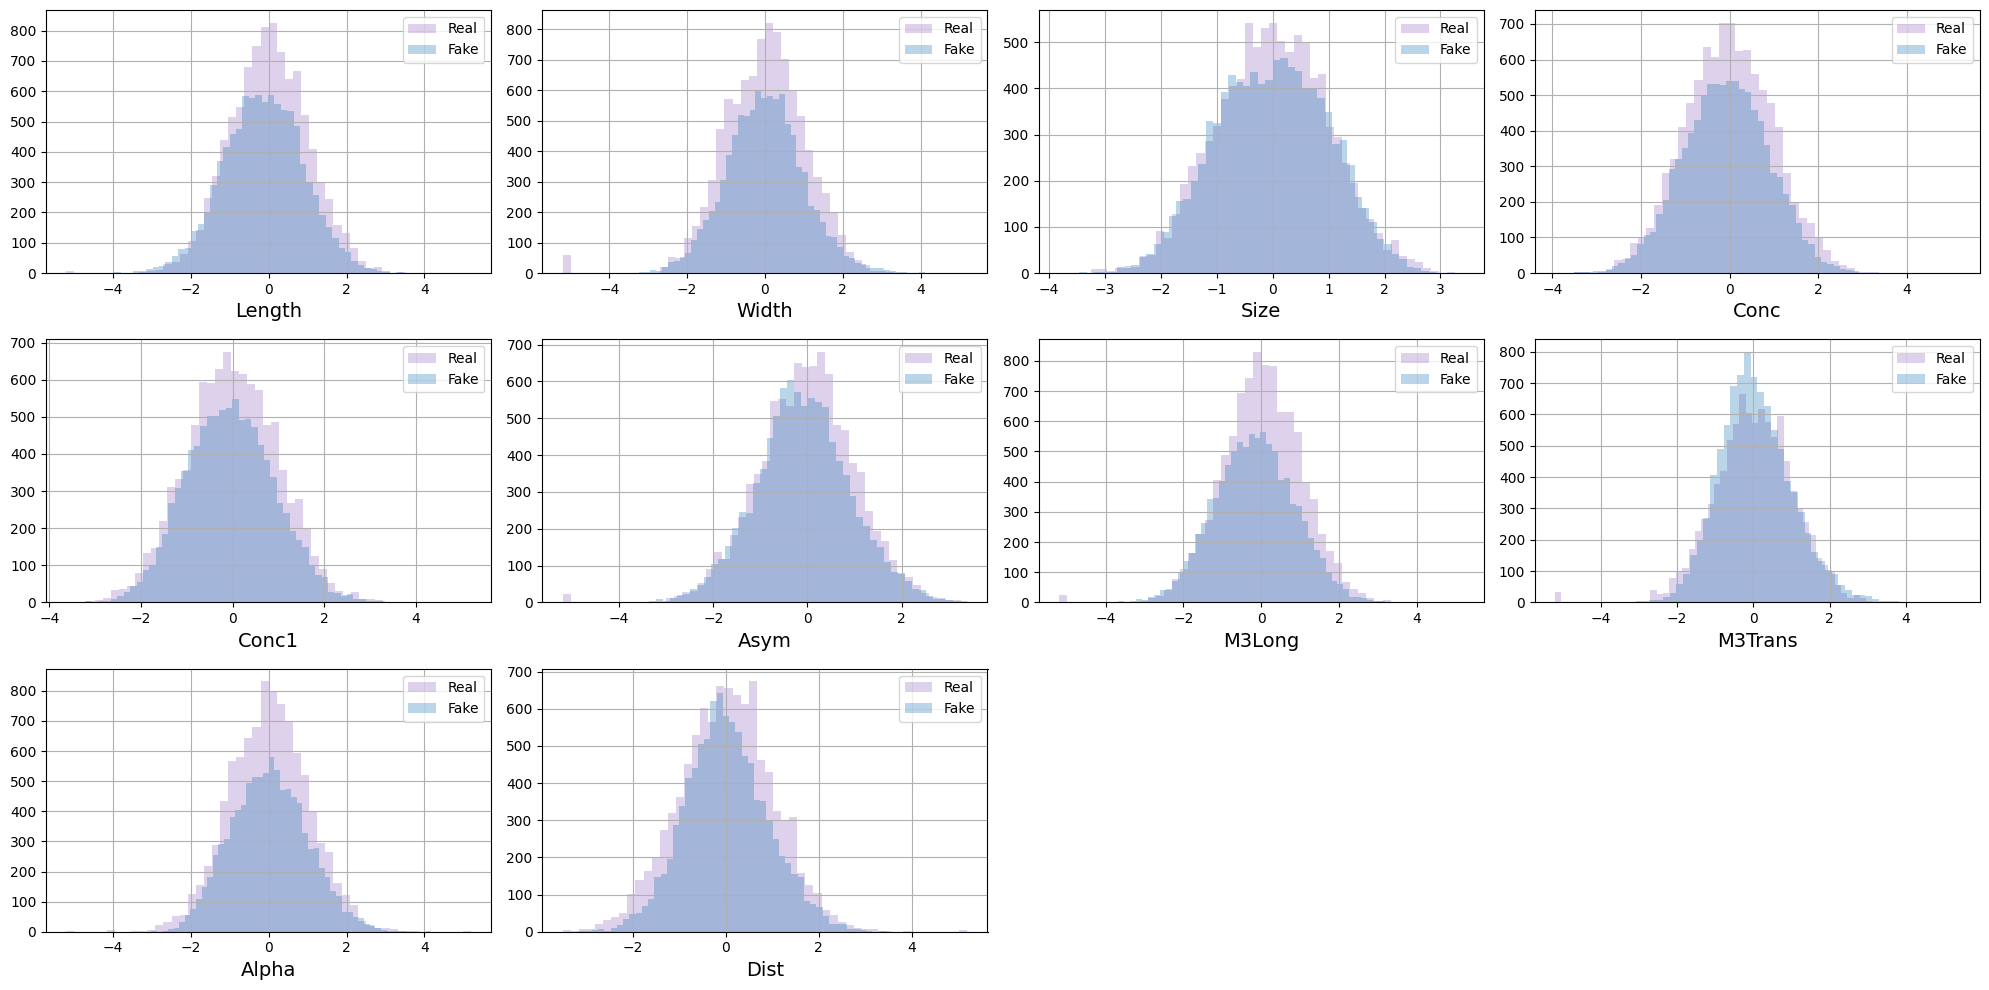

In [ ]:
plot_hists(X_test, X_fake_test, names, label1="Real", label2="Fake", bins=50)

# **After inverse transformation:**

In [ ]:
# do inverse transformation using quantile transformer
X_train = qt.inverse_transform(X_train)
X_test = qt.inverse_transform(X_test)

In [ ]:
y_train.shape[0]
y_train.dtype

dtype('float64')

In [ ]:
X_fake_train = generate(fitter.generator, y_train, latent_dim)
X_fake_train = qt.inverse_transform(X_fake_train)

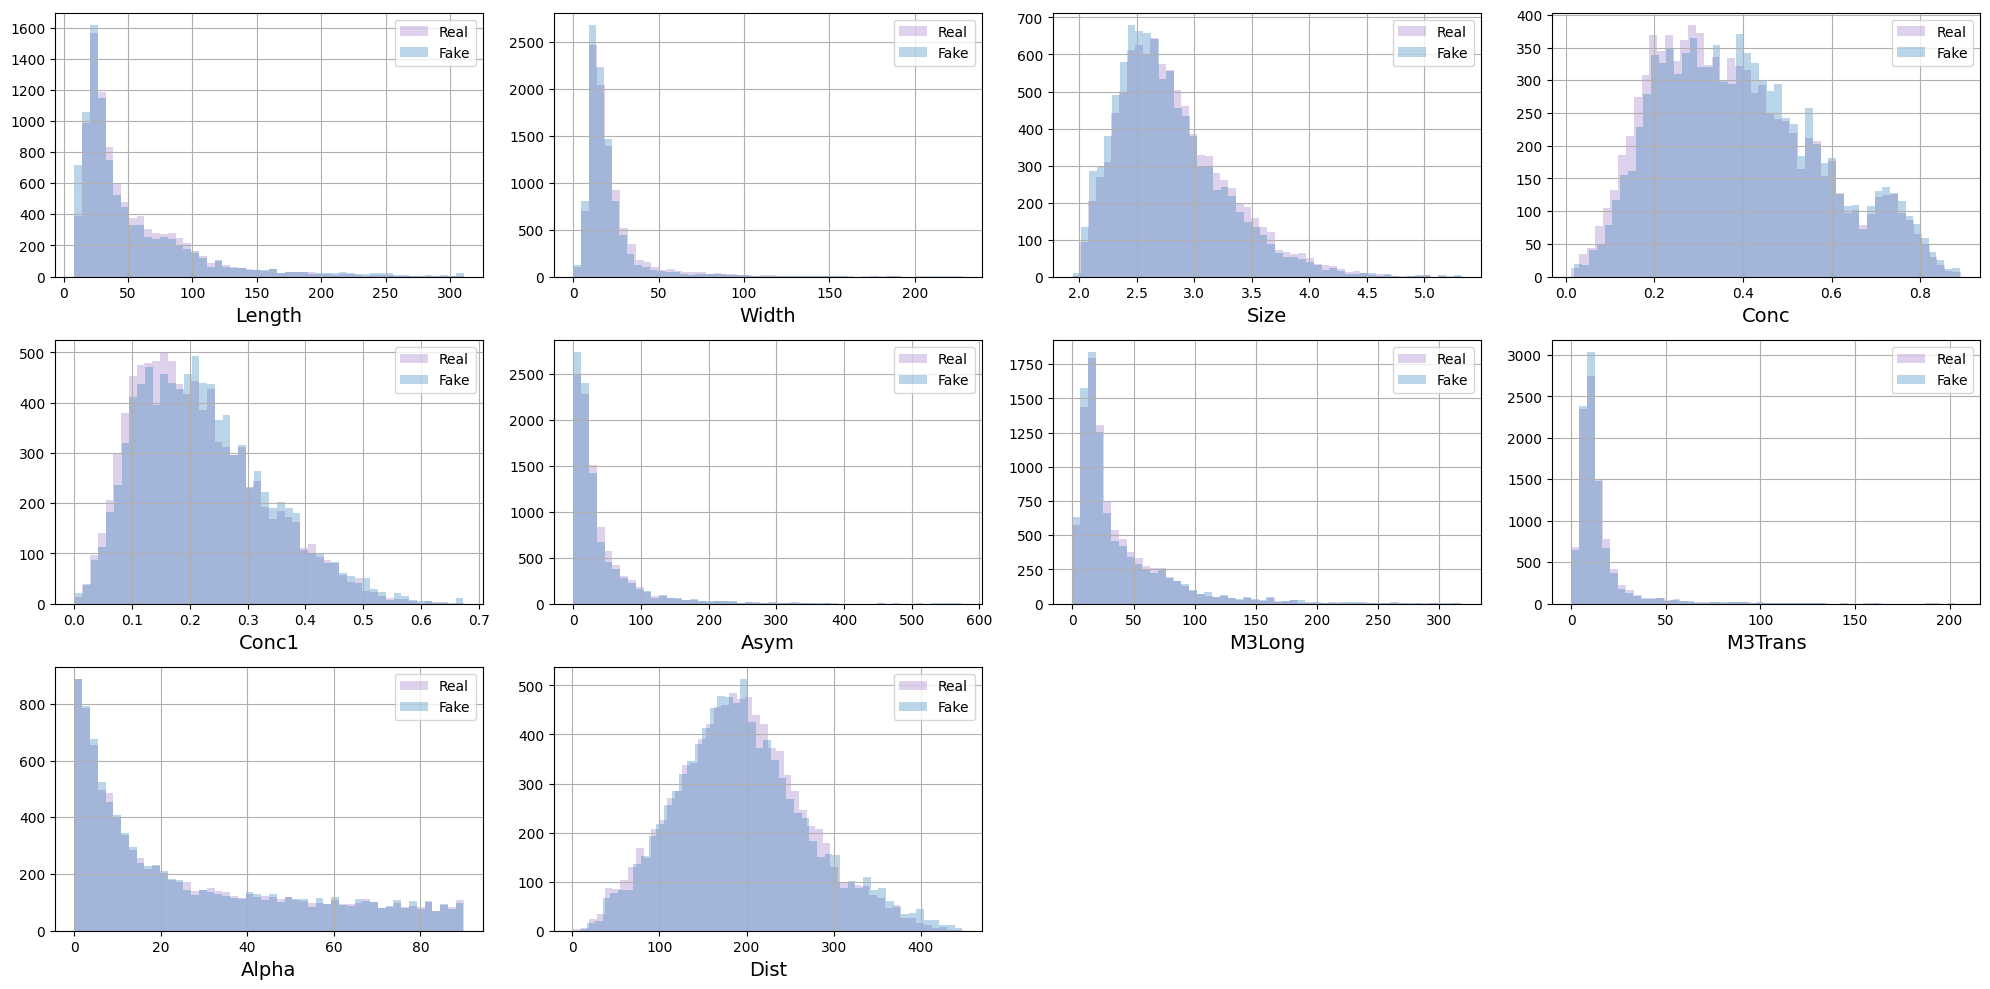

In [ ]:
plot_hists(X_train, X_fake_train, names, label1="Real", label2="Fake", bins=50)

In [ ]:
X_fake_test = generate(fitter.generator, y_test, latent_dim)
X_fake_test = qt.inverse_transform(X_fake_test)

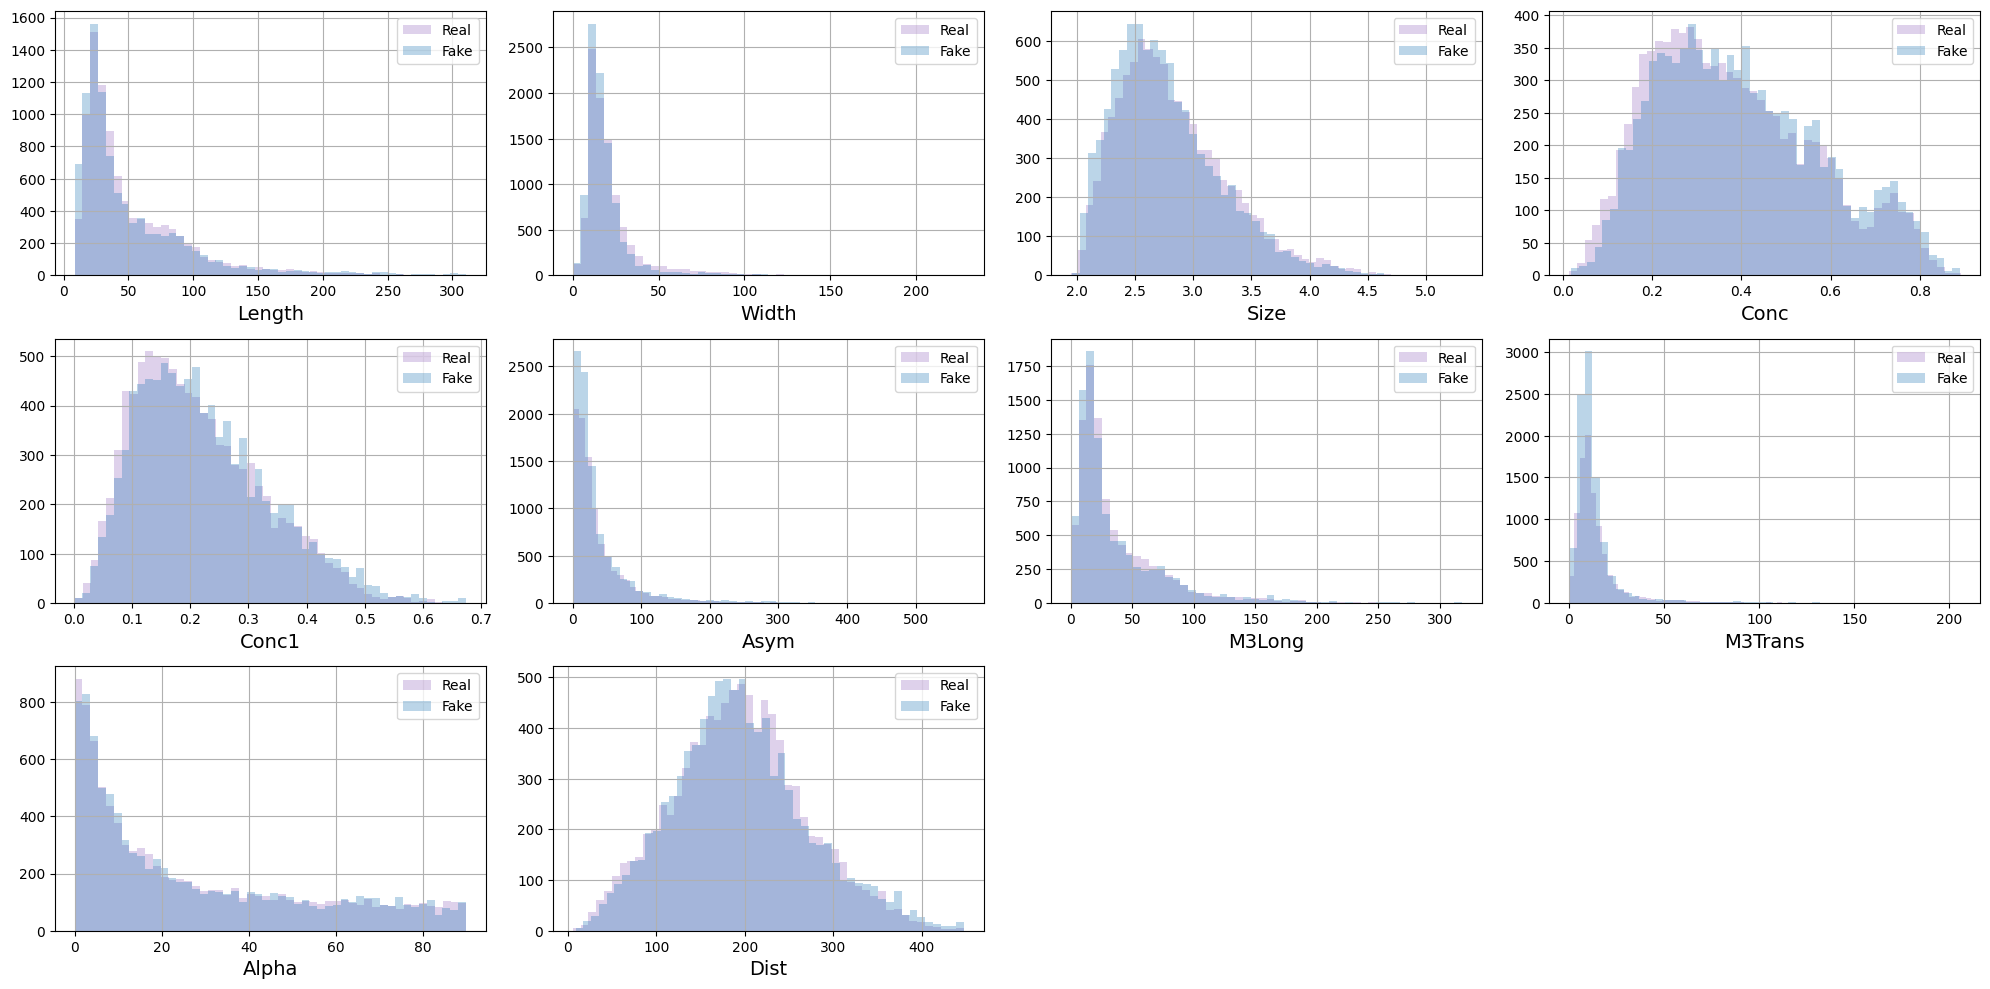

In [ ]:
plot_hists(X_test, X_fake_test, names, label1="Real", label2="Fake", bins=50)

## Вывод:
Визуально мы видим сходство реальных и фейковых данных. Однако это только проекции 10-мерных объектов на одну ось.

# Измерение качества генерации

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/2024/homeworks/hw1/img/clf.png?raw=1" width="600"></center>

Измерим сходство распределений классификатором.

In [ ]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((X_fake_train, X_train), axis=0)
XX_test = np.concatenate((X_fake_test, X_test), axis=0)

yy_train = np.array([0] * len(X_fake_train) + [1] * len(X_train))
yy_test = np.array([0] * len(X_fake_test) + [1] * len(X_test))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.7516673411462393


## Задание 9 (0.5 балла)

Опишите ваш эксперимент. Как вы оцениваете полученные результаты? Как вы думаете, какое значение ROC AUC нас удовлетворяет больше всего? Почему?


Having completed the experiment, it is fair to say that the results I got are quite satisfactory. AUC-ROC of 0.5 would be the worst result (the model's predictions are random), so ours of 0.75 (refer to the result above) can be considered quite good. Of course, the more the merrier, so a higher AUC-ROC would be better.

Other than that, I also plotted the graphs which (even though in 2D) illustrated a conspicuous similariy between the Real and Fake data. That means, the trained conditional WGAN model is quite good.

## Диффузионные модели.

Давайте теперь проведем такой же экперимент с простой диффузионной моделью.

In [17]:
!pip install diffusers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.4 MB/s eta 0:00:00


In [18]:
from diffusers import DDPMScheduler

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Задание 10 (0.5 балла)

Реализуйте фукнцию из семинара для зашумления данных, адаптировав ее под наш тип данных.

In [ ]:
X_train.shape[1]

10

**Since each sample has 10 features (width, length, etc.), the second value being passed to the 'amount' is going to be 10.**

In [19]:
def corrupt(x: torch.Tensor, amount: torch.Tensor) -> torch.Tensor:
    """
    Corrupt the input `x` by mixing it with noise according to `amount`
    :param amount: torch.Tensor of shape [x.shape[1], x.shape[2], x.shape[3]]
    """
    noise = torch.rand_like(x)
    amount = amount.view(-1, 10, 1, 1)  # the second value is 10 because of the number of features in X
    return x * (1 - amount) + noise * amount

## Добавим sсheduler, он пригодится вам при обучении модели

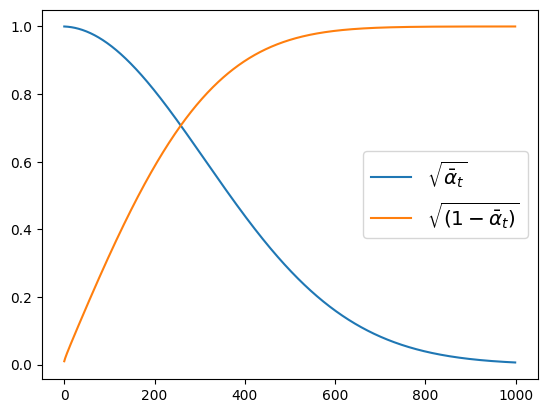

In [20]:
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)
plt.plot(
    noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$"
)
plt.plot(
    (1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5,
    label=r"$\sqrt{(1 - \bar{\alpha}_t)}$",
)
plt.legend(fontsize="x-large")

## Задание 11 (0.5 балла)

Реализуйте нейронную сеть. В качетсве архитектуры можете взять модель генератора. В процессе экспериментов попробуйте изменять архитектуру модели для улучшения качества сгенерированных объектов (Кстати, как вы будете качество измерять?).

- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Выходной слой.

In [81]:
class DiffusionGenerator(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(DiffusionGenerator, self).__init__()

        self.fc1 = nn.Linear(n_inputs, 100)
        self.bn1 = nn.BatchNorm1d(100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 100)
        self.bn2 = nn.BatchNorm1d(100)
        self.output_layer = nn.Linear(100, n_outputs)

    def forward(self, z, y):
        y = torch.tensor(y, dtype=torch.float, device=device) # convert to tensor
        zy = torch.cat((z, y), dim=1)

        # doing a forward pass
        x = self.fc1(zy)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        output = self.output_layer(x)
        return output

Visual inspection in this case might not be the best choice (compared to MNIST from the seminar) since each X sample has 10 different features. However, using Precision, Recall and some other metrics would be a more feasible and just overall a better idea.

## Задание 12 (0.5 балла)

Напишите функцию для генерации нового объекта с помощью обученной модели.

In [82]:
def generate_with_diffusion(model, y, latent_dim, scheduler):
    model.eval()

    # generate noise
    batch_size = y.shape[0]
    Z_noise = torch.randn(batch_size, latent_dim).to(device)

    # generate fake objects using model
    with torch.no_grad():
      X_fake = model(Z_noise, y)

    # add noise with scheduler
    timesteps = torch.linspace(0, 999, batch_size).long().to(device)
    noise = torch.randn_like(X_fake)  # noise generation
    X_fake = scheduler.add_noise(X_fake, noise, timesteps)  # perturbing fake samples

    return X_fake.cpu().numpy()

## Задание 13 (2 балла)

Напишите класс обучения диффузионной модели и обучите модель, после чего опишите полученные результаты. В качестве подсказки - опирайтесь на семинар по диффузионным моделям. Вы можете изменять некоторые части кода для вашего удобства, но оставляйте в таком случаи комментарии, пожалуйста.

***Used this:*** In the forward diffusion stage, the input data is gradually perturbed over several steps by adding Gaussian noise. In the reverse stage, a model is tasked at recovering the original input data by learning to gradually reverse the diffusion process, step by step.

**Source:** https://www.researchgate.net/publication/367529697_Input_Perturbation_Reduces_Exposure_Bias_in_Diffusion_Models_ICML_2023

In [83]:
class DiffusionFitter(object):
    def __init__(
        self,
        model,
        batch_size=32,
        n_epochs=10,
        latent_dim=1,
        lr=0.0001,
        n_critic=5,
    ):

        self.model = model
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr
        self.n_critic = n_critic

        self.opt_gen = torch.optim.RMSprop(self.model.parameters(), lr=self.lr)

        self.model.to(device)

    def fit(self, X, y):

        # numpy to tensor
        X_real = torch.tensor(X, dtype=torch.float, device=device)
        y_cond = torch.tensor(y, dtype=torch.float, device=device)

        # tensor to dataset
        dataset_real = TensorDataset(X_real, y_cond)

        # Turn on training
        self.model.train(True)

        self.loss_history = []

        # Fit GAN
        for epoch in range(self.n_epochs):
            loss_epoch = 0
            for i, (real_batch, cond_batch) in enumerate(
                DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True)
            ):
                self.opt_gen.zero_grad()

                # generate noise
                noise = torch.randn_like(real_batch)

                # generate fake data
                Z_noise = torch.randn((len(real_batch), self.latent_dim)).to(device)
                X_fake = self.model(Z_noise, cond_batch)

                # add noise using the approach from the seminar
                timesteps = torch.linspace(0, 999, real_batch.shape[0]).long().to(device)
                X_fake_noisy = noise_scheduler.add_noise(X_fake, noise, timesteps)

                # calculate loss
                loss = F.mse_loss(X_fake_noisy, noise)  # we're trying to predict the amount of noise (!)

                # backpropagation
                loss.backward()
                self.opt_gen.step()

                loss_epoch += loss.item()

            # calculate and store loss after an epoch

            self.loss_history.append(loss_epoch)

            # Создайте выборку из 1000 объектов из X_train и 1000 сгенерированных объектов
            # И запустите работу фукнции other_agent_score

            X_fake_samples = generate_with_diffusion(self.model, y_cond[:1000], self.latent_dim, noise_scheduler)
            X_real_samples = X_real[:1000].cpu().numpy()

            # launching other_agent_score function
            other_agent_score(X_real_samples, np.ones(len(X_real_samples)), X_fake_samples, np.zeros(len(X_fake_samples)))
            print(f"Loss after {epoch+1} epoch is: {loss_epoch}")

        # Turn off training
        self.model.train(False)

In [84]:
%%time
latent_dim = 10
model = DiffusionGenerator(n_inputs=latent_dim + y.shape[1], n_outputs=X_train.shape[1])

diffusionFitter = DiffusionFitter(
    model,
    batch_size=50,
    n_epochs=100,
    latent_dim=latent_dim,
    lr=0.0001,
    n_critic=5,
)
diffusionFitter.fit(X_train, y_train)

Linear regression score: 0.4666666666666667
Boosting score: 0.885
Loss after 1 epoch is: 25.93485599756241
Linear regression score: 0.49166666666666664
Boosting score: 0.905
Loss after 2 epoch is: 24.6347533762455
Linear regression score: 0.4683333333333333
Boosting score: 0.8466666666666667
Loss after 3 epoch is: 24.03307018429041
Linear regression score: 0.52
Boosting score: 0.8816666666666667
Loss after 4 epoch is: 24.25062880665064
Linear regression score: 0.49333333333333335
Boosting score: 0.8933333333333333
Loss after 5 epoch is: 24.050195083022118
Linear regression score: 0.515
Boosting score: 0.9033333333333333
Loss after 6 epoch is: 24.316232353448868
Linear regression score: 0.45166666666666666
Boosting score: 0.905
Loss after 7 epoch is: 23.580471232533455
Linear regression score: 0.5466666666666666
Boosting score: 0.9
Loss after 8 epoch is: 23.605199918150902
Linear regression score: 0.49333333333333335
Boosting score: 0.8883333333333333
Loss after 9 epoch is: 23.823794171

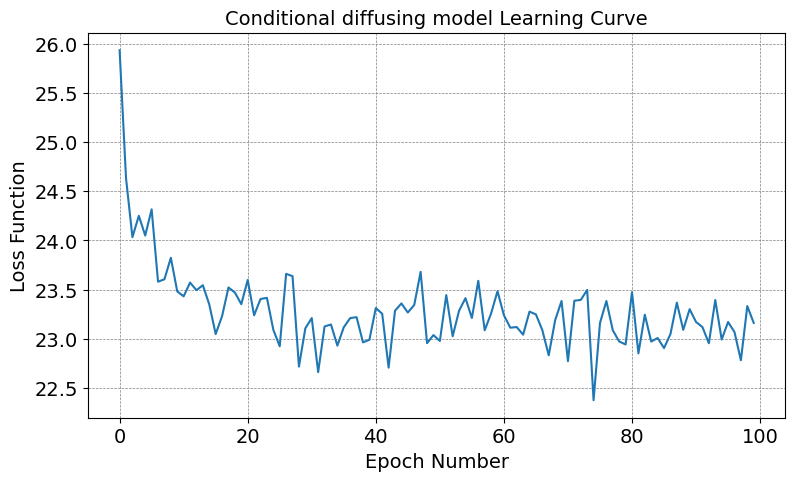

In [85]:
# diffusion learning curve
plt.figure(figsize=(9, 5))
plt.plot(diffusionFitter.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional diffusing model Learning Curve", size=14)
plt.grid(linestyle="--", linewidth=0.5, color="0.5")
plt.show()

## Задание 14 (0.5 балла)
По аналогии с прошлым экспериментом с GAN моделью сгенерируйте выборку фейковых объектов равную размеру тестовой выборки и обучите градиентный бустинг. Обучите модель отличать реальные объекты от фейковых, после чего расчитайте метрики ROC-AUC и accuracy score. Какие получились результаты? Как вы их оцениваете? А в сравнении с GAN моделью?

In [86]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [87]:
X_fake_train = generate_with_diffusion(diffusionFitter.model, y_train, latent_dim, noise_scheduler)
X_fake_test = generate_with_diffusion(diffusionFitter.model, y_test, latent_dim, noise_scheduler)

## **Illustrating results before inverse transformation**

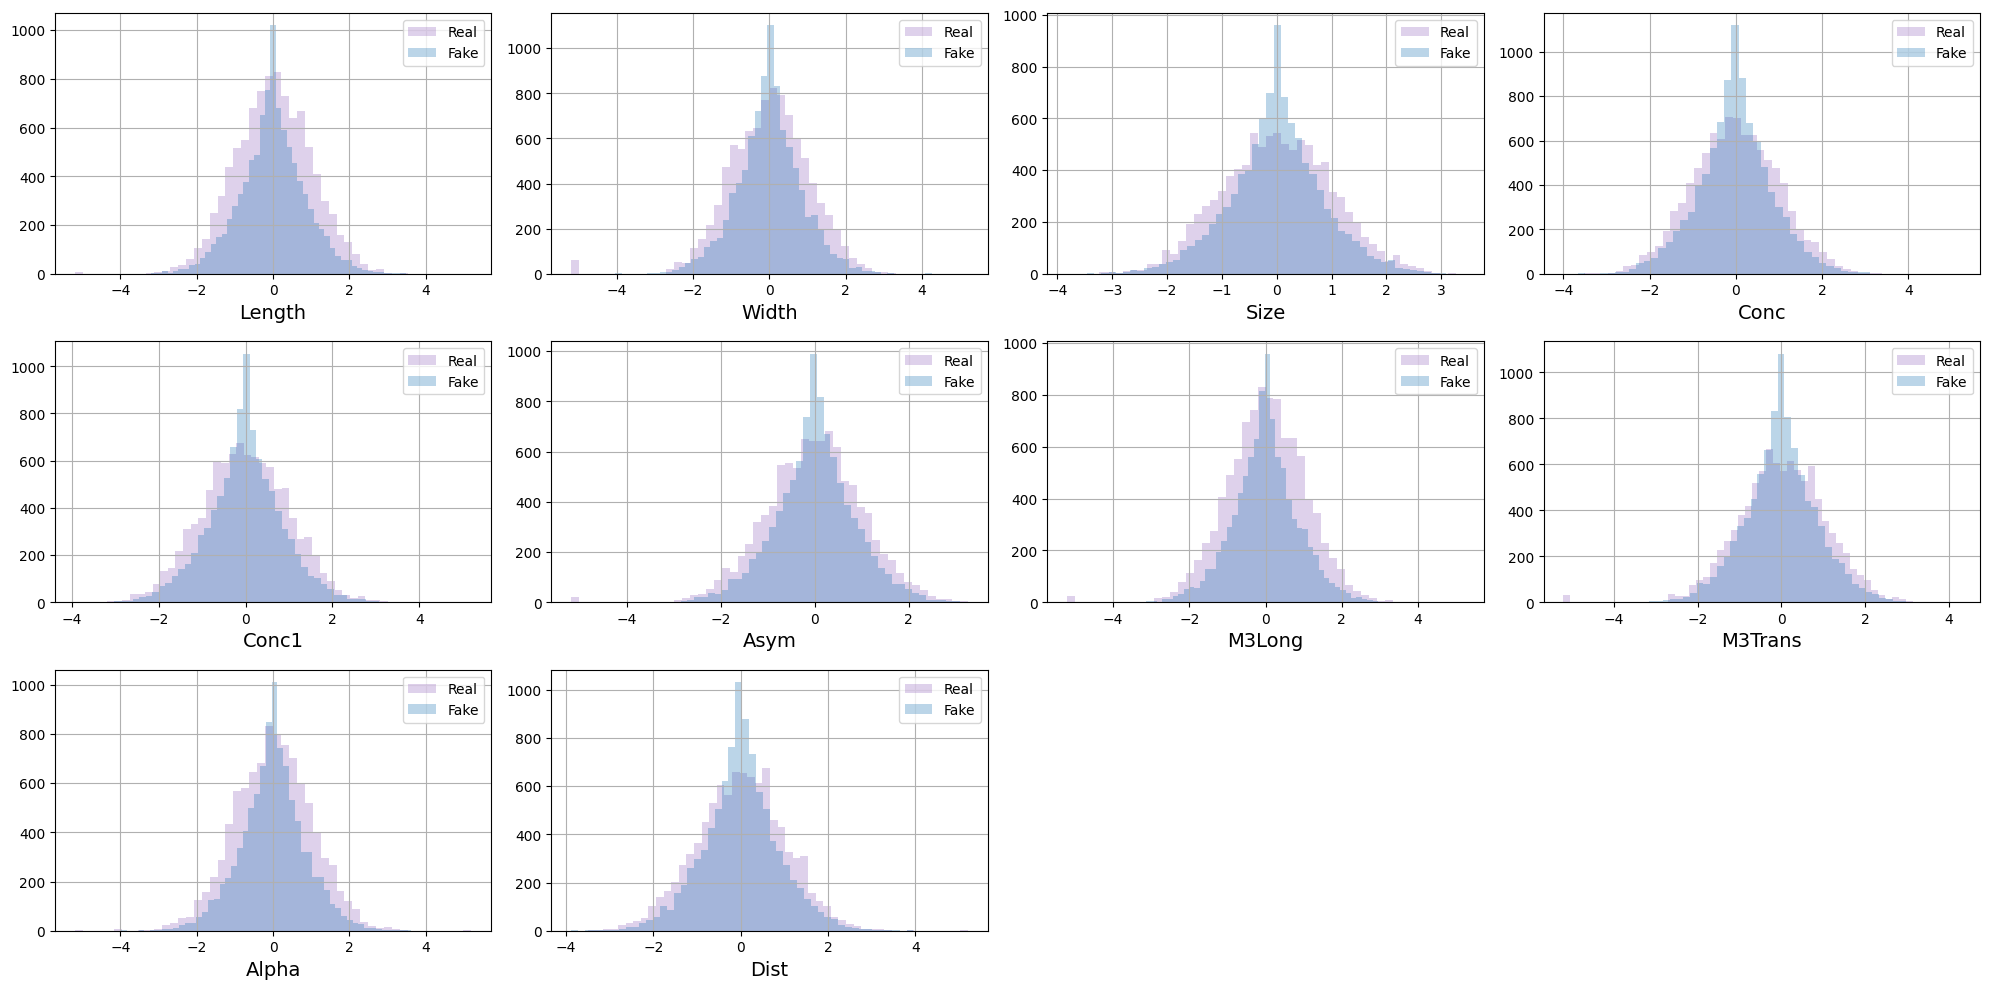

In [88]:
plot_hists(X_test, X_fake_test, names, label1="Real", label2="Fake", bins=50)

In [89]:
X_fake_train = qt.inverse_transform(X_fake_train)
X_fake_test = qt.inverse_transform(X_fake_test)

X_train = qt.inverse_transform(X_train)
X_test = qt.inverse_transform(X_test)

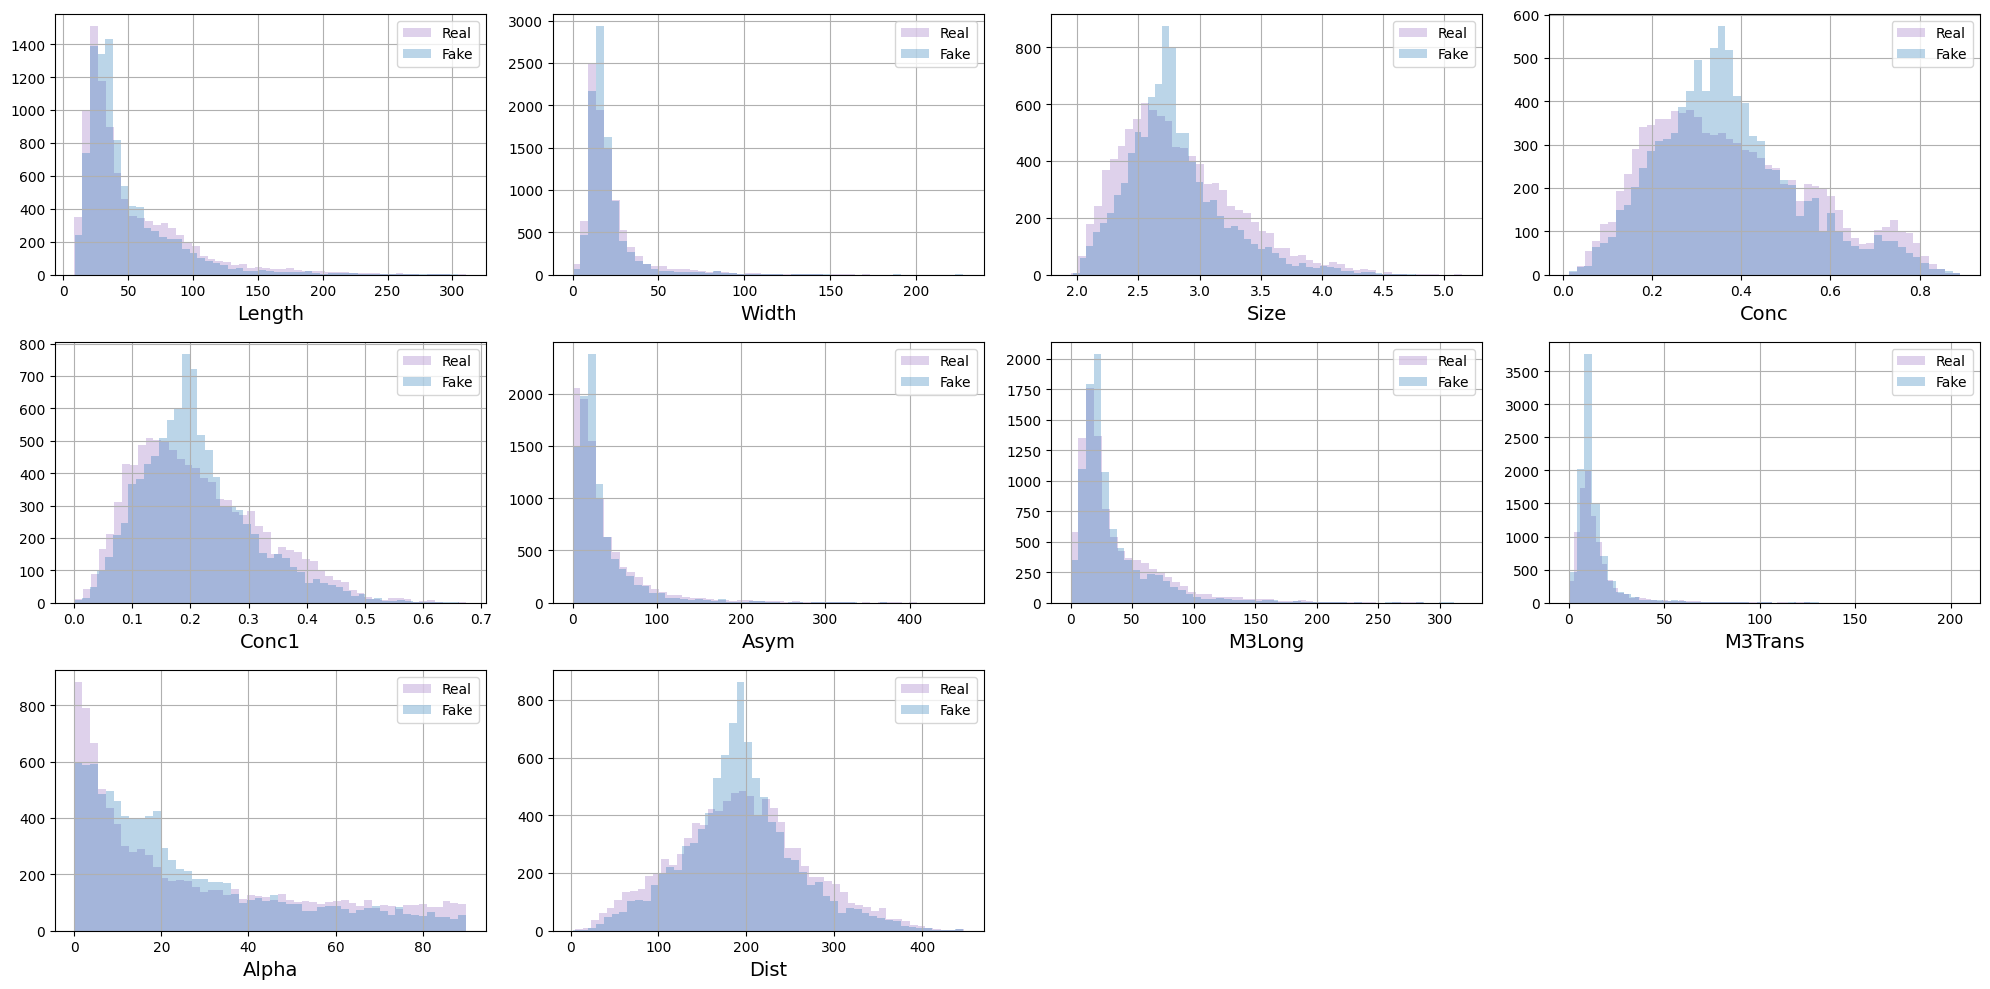

In [90]:
# illustrate after inverse quantile transformation
plot_hists(X_test, X_fake_test, names, label1="Real", label2="Fake", bins=50)

In [110]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((X_fake_train, X_train), axis=0)
XX_test = np.concatenate((X_fake_test, X_test), axis=0)

yy_train = np.array([0] * len(X_fake_train) + [1] * len(X_train))
yy_test = np.array([0] * len(X_fake_test) + [1] * len(X_test))

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [105]:
auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.9771946127879118


In [114]:
from sklearn.metrics import accuracy_score as sklearn_accuracy_score
yy_test_pred = clf.predict(XX_test)
accuracy_score = sklearn_accuracy_score(yy_test, yy_test_pred)
print("Accuracy = ", accuracy_score)

Accuracy =  0.9205573080967403


## Отзыв

Поздравляю! Вы дошли до конца. Оставьте ваш отзыв ячейкой ниже или отправьте его в канал курса, нам будет очень интересно!